![image.png](https://i.imgur.com/a3uAqnb.png)


In [35]:
from IPython.display import clear_output

In [36]:
# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

# %pip install numpy
# %pip install scikit-learn
# %pip install matplotlib
# %pip install tqdm

clear_output()

In [37]:
import math
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Contents:

1. Scratch implementation of Logistic Regression using numpy on custom data
2. Sklearn implementation of Logistic Regression on IRIS dataset


You need to know:

1. **numpy** (for impelementation)
2. a little bit of **matplotlib** (for visualization)


Good to have knowledge of:

1. Sklearn (details of the functions is given anyways)

## Implementing Logistic Regression from Scratch

Before we get to coding, Here's are the equations for logistic regression cost function (cross-entropy) and sigmoid function

Cost function:

$$
Cross-Entropy-Loss = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

Sigmoid:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

In [38]:
def sigmoid(z):
    """
    Apply sigmoid function. Sigmoid brings the output in 0 to 1 range
    """
    return 1 / (1 + np.exp(-z))


def log_reg_cost(y, y_pred):  # cross entropy
    """
    Calculates and returns the cost for logistic regression.

    Function is slightly different from mentioned above because this one handles batched/vector/multiple inputs (rather than just one).
    This function sums and takes average across the vector.
    """
    epsilon = 1e-15
    # y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    cost = -1/len(y) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    # cost = np.sum(-y * np.log(y_pred+epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))/len(y)
    return cost


def log_reg_gradient_descent(X, y, learning_rate, n_iters=500):
    """
    Runs gradient descent (param optimization) for logistic regression and returns optimized weights.
    """
    m, n = X.shape
    theta = np.zeros(n)

    losses = []

    for _ in tqdm(range(n_iters)):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= learning_rate * gradient

        loss = log_reg_cost(y, y_pred)
        losses.append(loss)

    plt.plot(losses)

    return theta

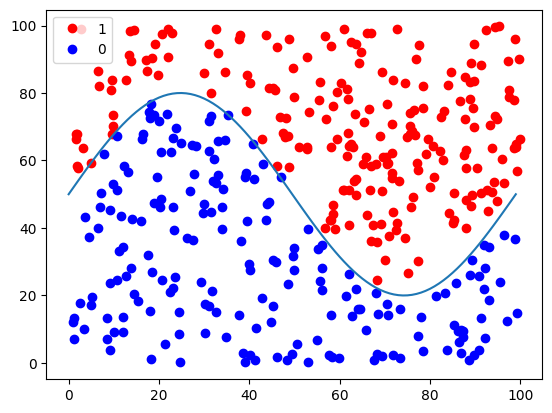

In [39]:
# Let's build a custom dataset for our logistic regression model

n_points = 400  # num of points in generated data
max_coordinate_value = 100  # max possible value taken by the x or y coordinate of a point

points = np.random.rand(n_points, 2) * max_coordinate_value

l = np.sin(2*math.pi*(points[:, 0]/max_coordinate_value))
l = (l*0.3*max_coordinate_value)+(max_coordinate_value/2)
mask = points[:, 1] > l

labels = np.zeros(n_points)
labels[mask] = 1

divider = (30 * np.sin(2*math.pi*np.linspace(0, max_coordinate_value, max_coordinate_value)/max_coordinate_value))
divider = max_coordinate_value/2 + divider

plt.plot(points[mask][:, 0], points[mask][:, 1], 'ro', label='1')
plt.plot(points[~mask][:, 0], points[~mask][:, 1], 'bo', label='0')
plt.plot(divider)  # visualization only

plt.legend()
plt.show()

In [40]:
# rename to X and y.

X = points
y = labels

print(f'Current X shape: {X.shape}')

intercept_col = np.ones(X.shape[0])  # a column of 1's for intercept value
X = np.column_stack((X, intercept_col))

print(f'New X shape: {X.shape}. Extra col added for intercept value')

Current X shape: (400, 2)
New X shape: (400, 3). Extra col added for intercept value


100%|██████████████████████████████████████████████████████████████████████████| 30000/30000 [00:00<00:00, 79122.48it/s]


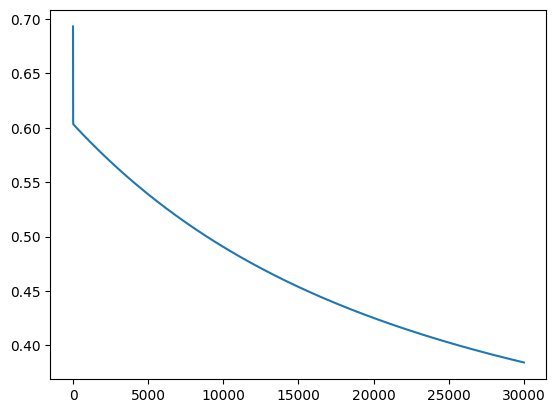

In [41]:
# Run Optimization

num_iters = 30000
lr = 1e-3

theta = log_reg_gradient_descent(X, y, lr, num_iters)

In [42]:
theta

array([ 0.01303695,  0.04458176, -2.50392067])

In [43]:
y_pred = sigmoid(np.dot(X, theta))  # output of sigmoid is in range 0-1
y_pred = np.round(y_pred)  # round to 0 or 1

correct_mask = (y_pred == y)
correct_count = correct_mask.sum()
total_count = len(y_pred)

print(f'The model predicted {correct_count} out of {total_count} predictions correctly')
print(f'The Accuracy is {correct_count/total_count} ({correct_count/total_count*100}%)')

The model predicted 348 out of 400 predictions correctly
The Accuracy is 0.87 (87.0%)


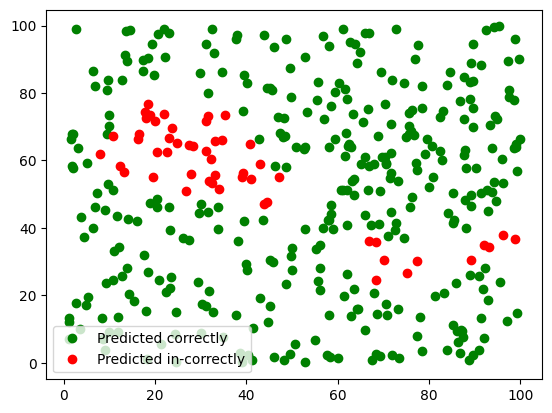

In [44]:
plt.plot(X[correct_mask][:, 0], X[correct_mask][:, 1], 'go', label='Predicted correctly')
plt.plot(X[~correct_mask][:, 0], X[~correct_mask][:, 1], 'ro', label='Predicted in-correctly')

plt.legend()
plt.show()

Before we move on, let's also take a look at confusion matrix

confusion matrix shows us the following:

```
TP FP
FN TN
```

i.e

- True Positive: How many actual labels were positive and were predicted positive too
- False Positive: How many actual labels were negative but were predicted positive
- False Negative: How many actual labels were positive but were predicted negative
- True Negative: How many actual labels were negative and were predicted negative

In [45]:
confusion_matrix(y, y_pred)

array([[143,  46],
       [  6, 205]])

## Sklearn implementation

Also, let's try it on a famous dataset

We'll work with **Iris** dataset.

### About Iris
The dataset is about classfying flowers based on length of their parts.
There are more than 3 classes in it but we'll just pick a class and predict wether a flower IS that class or ISN'T

### train test split
We'll also seperate the test data out of training data, a common practice in when training models to see their performance

In [46]:
# let's load iris and have a look at it

iris_data = load_iris()  # returns a dict
print(iris_data.keys(), '\n')

print('given features:', iris_data['feature_names'])
print('flower names (class names):', iris_data['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

given features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
flower names (class names): ['setosa' 'versicolor' 'virginica']


In [47]:
# Those are the given details. We're  concerned about 'data' (containing features of flowers) and target (containing classes)

X = np.array(iris_data['data'])
y = np.array(iris_data['target'])

# Data is sorted by y. Let's shake things up a bit

shuffled_idxs = list(range(0, len(y)))
np.random.shuffle(shuffled_idxs)

X = X[shuffled_idxs]
y = y[shuffled_idxs]

In [48]:
y

array([2, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2,
       0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0,
       1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2,
       0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0])

In [49]:
print(X.shape)
print(y.shape)

print(np.unique(y))

(150, 4)
(150,)
[0 1 2]


In [50]:
# The next step after getting your hands on a dataset might normally be EDA, but we'll skip that.
# we'll make a logistic regression model for class '0' (named setosa). The model returns 1 for flower IS setosa and 0 for flower is NOT setosa

y[y==0]  = -1  # placeholder value
y[y>0]   =  0
y[y==-1] =  1  # Setosa labels are now 1 in 'y' and other flower's are 0

In [51]:
y  # 0 is replaced with 1 and non-0 are now 0

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

Explanation of train_test_split

The function is used to seperate out train and test data so we can train on different data and evaluate on different data.

- Stratify: the shuffle will be made in such a way that the column specified in stratify will have equal distribution of different values in train and test splits.
In our case, 1/3 of total data is 1 and 2/3 of data is 0. Stratifying by y means that this will be the case for y_train and y_test as well.
- random_state: normally, split are made randomly but specifying a state means this cell will make the same split everytime.
- train_size: how much of the data (out of 1) is kept as training. 0.7 means 70% data goes to training and 30% goes to testing

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123, train_size=0.7)

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)  # we train on training data only

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
y_pred = model.predict(X_test)  # to check the performance, we use the testing data split

In [55]:
correct_mask = (y_pred == y_test)  # the predictions from testing features is supposed to be compared to labels of testing data
correct_count = correct_mask.sum()
total_count = len(y_pred)

print(f'The model predicted {correct_count} out of {total_count} predictions')
print(f'The Accuracy is {correct_count/total_count} ({correct_count/total_count*100}%)')

The model predicted 45 out of 45 predictions
The Accuracy is 1.0 (100.0%)


In [56]:
confusion_matrix(y_test, y_pred)

array([[30,  0],
       [ 0, 15]])

END.